In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
ins_df = pd.read_csv('C:/Users/SALMAN/Downloads/carInsurance_train.csv')
ins_df_test = pd.read_csv('C:/Users/SALMAN/Downloads/carInsurance_test.csv')

In [5]:
ins_df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


In [6]:
print('Shape of training data',ins_df.shape)
print('Shape of test data',ins_df_test.shape)

Shape of training data (4000, 19)
Shape of test data (1000, 19)


In [7]:
ins_df.isna().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [8]:
ins_df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [9]:
ins_df.describe(include='object')

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,13:54:34,11:27:46
freq,893,2304,1988,2831,1049,437,3,3


## Visualizing data -

In [10]:
imp_features = ['CarInsurance','Age','Balance','HHInsurance','CarLoan','NoOfContacts','DaysPassed','PrevAttempts']

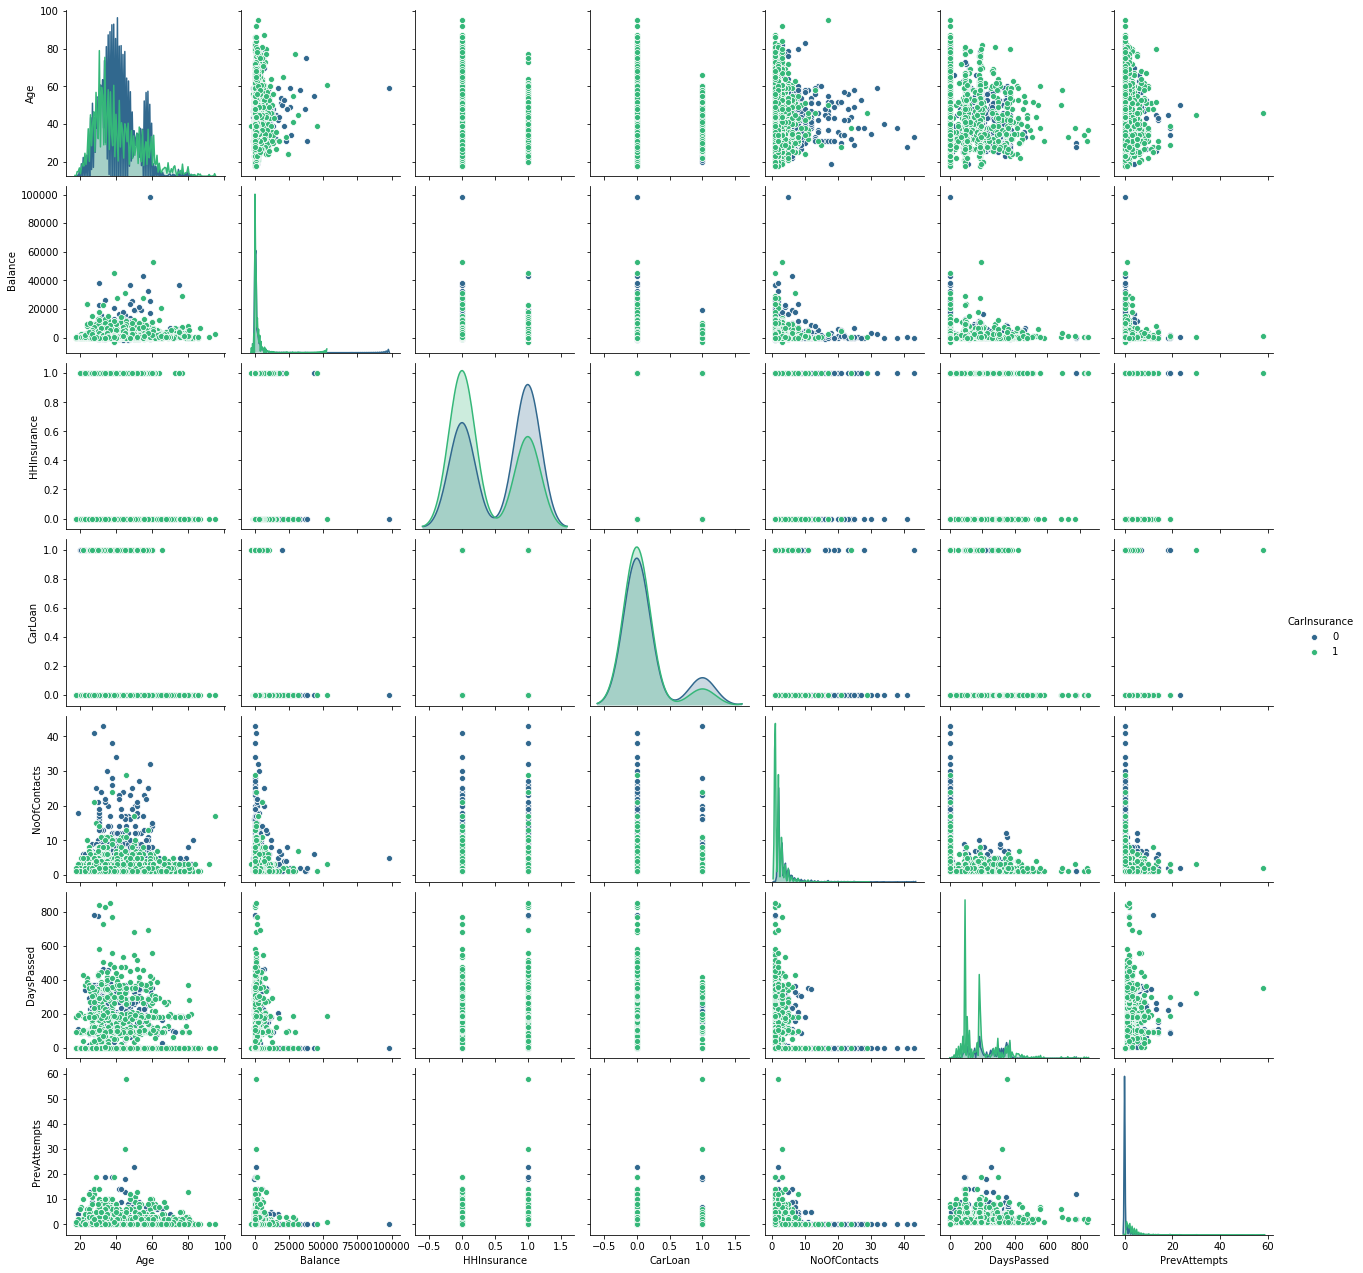

In [37]:
sns.pairplot(ins_df[imp_features], hue='CarInsurance', palette='viridis', height=2.5, diag_kws={'bw': 0.2})

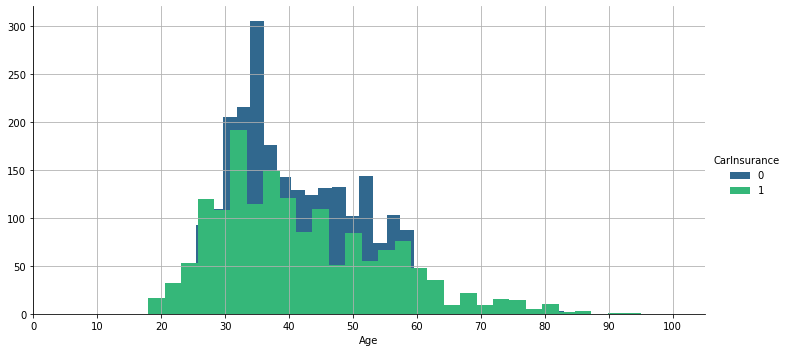

In [13]:
# take a look at age

facet = sns.FacetGrid(ins_df, hue='CarInsurance',  height=5, aspect=2, palette='viridis')
facet.map(plt.hist, 'Age', bins=30)
facet.set(xlim = (0, ins_df.Age.max()+10))
facet.add_legend()
plt.xticks(np.arange(0,110,10))
plt.grid()

- people of age bw 20-30 genrally buys the insurance. Most of the people of age between 30-40 dont buy car insurance. And after 60 most of the people buy insurance

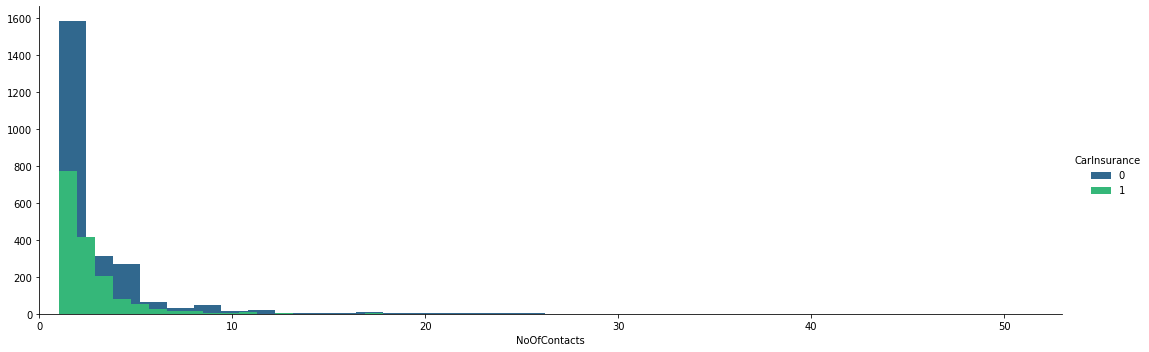

In [40]:
facet = sns.FacetGrid(ins_df, hue='CarInsurance', size=5, aspect=3, palette='viridis')
facet.map(plt.hist, 'NoOfContacts', bins=30)
facet.set(xlim = (0, ins_df.NoOfContacts.max()+10))
facet.add_legend()

- Most of the people having less contacts doesnt buy insurance.

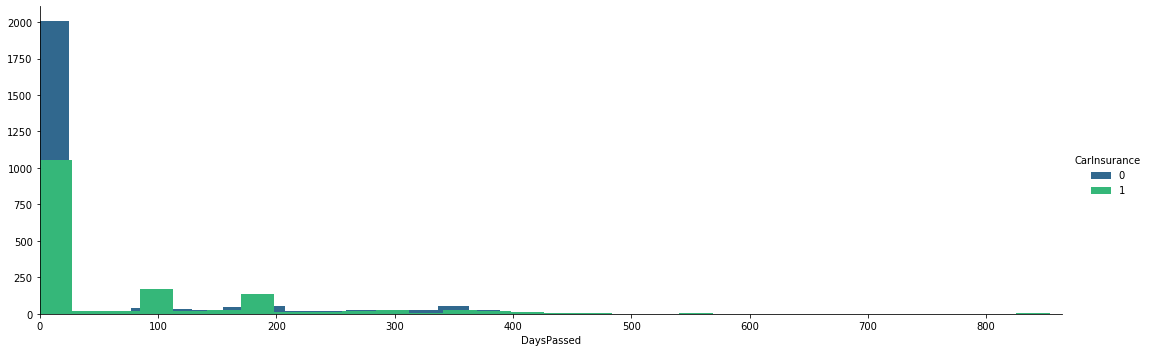

In [16]:
facet = sns.FacetGrid(ins_df, hue='CarInsurance', height=5, aspect=3, palette='viridis')
facet.map(plt.hist, 'DaysPassed', bins=30)
facet.set(xlim = (0, ins_df.DaysPassed.max()+10))
facet.add_legend()

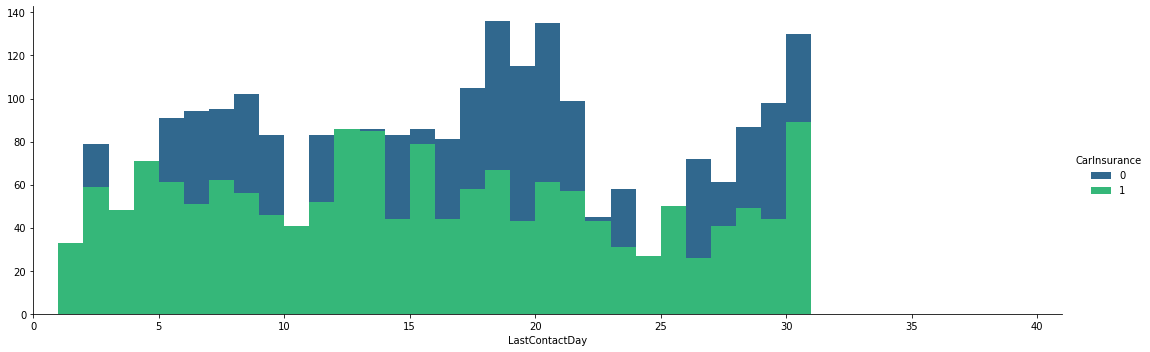

In [17]:
facet = sns.FacetGrid(ins_df, hue='CarInsurance', height=5, aspect=3, palette='viridis')
facet.map(plt.hist, 'LastContactDay', bins=30)
facet.set(xlim = (0, ins_df.LastContactDay.max()+10))
facet.add_legend()

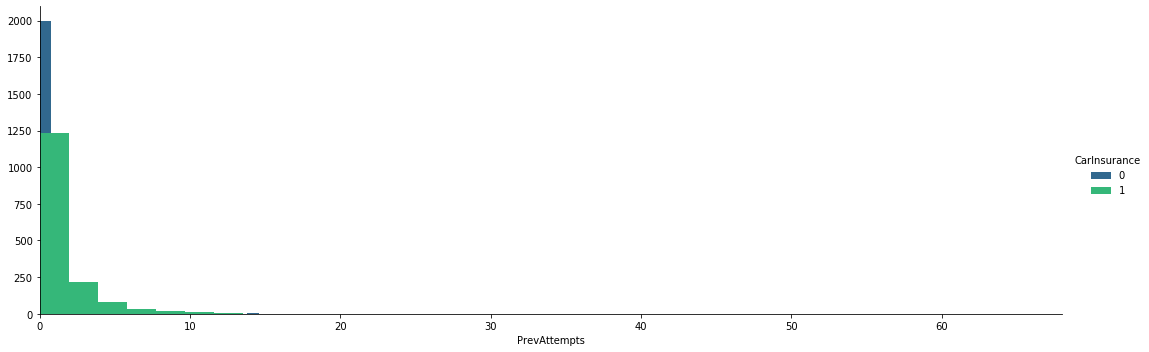

In [18]:
facet = sns.FacetGrid(ins_df, hue='CarInsurance', height=5, aspect=3, palette='viridis')
facet.map(plt.hist, 'PrevAttempts', bins=30)
facet.set(xlim = (0, ins_df.PrevAttempts.max()+10))
facet.add_legend()

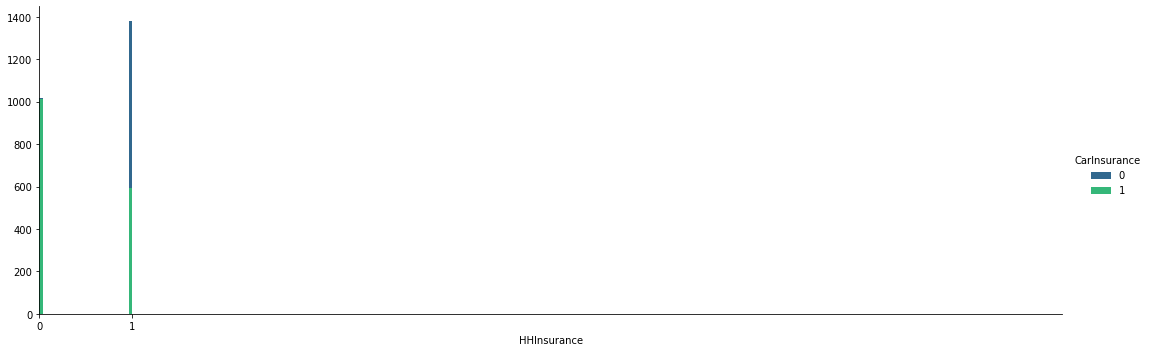

In [22]:
facet = sns.FacetGrid(ins_df, hue='CarInsurance', height=5, aspect=3, palette='viridis')
facet.map(plt.hist, 'HHInsurance', bins=30)
facet.set(xlim = (0, ins_df.HHInsurance.max()+10))
plt.xticks([0,1])
facet.add_legend()

- People who doesnt have the health insurance buys car insurance.

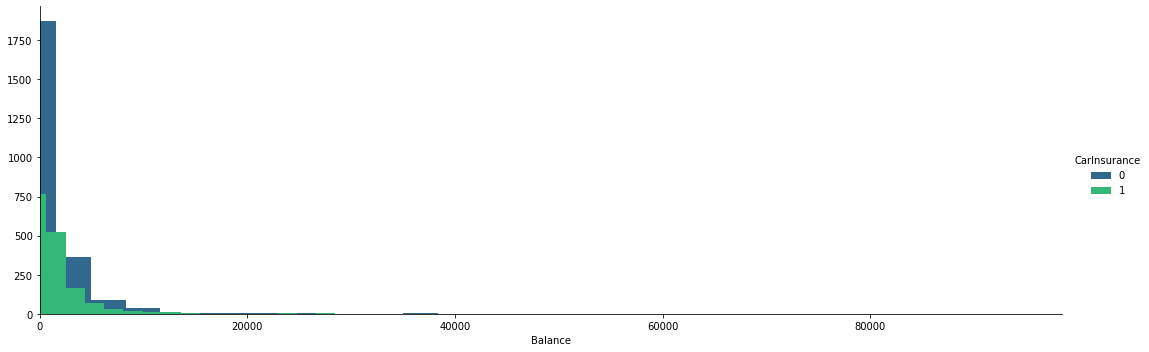

In [23]:
facet = sns.FacetGrid(ins_df, hue='CarInsurance', height=5, aspect=3, palette='viridis')
facet.map(plt.hist, 'Balance', bins=30)
facet.set(xlim = (0, ins_df.Balance.max()+10))
facet.add_legend()

- most of th people with minimum balance dont buy carinsurance

In [24]:
# get categorical variables -

categorical_cols = ins_df.select_dtypes(include='object').columns

In [25]:
categorical_cols

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [26]:
# removing call start and call end variables

categorical_col_plot = categorical_cols[(categorical_cols!='CallStart') & (categorical_cols!='CallEnd')]

In [27]:
categorical_col_plot

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome'],
      dtype='object')

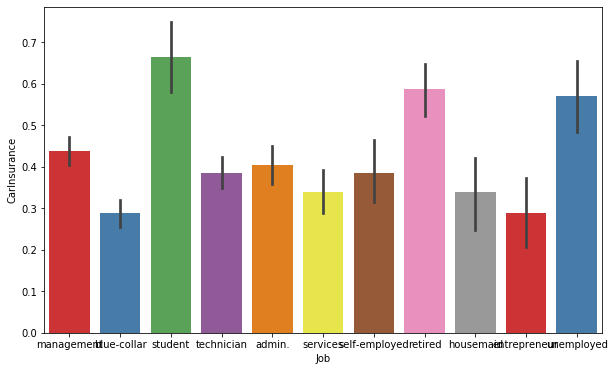

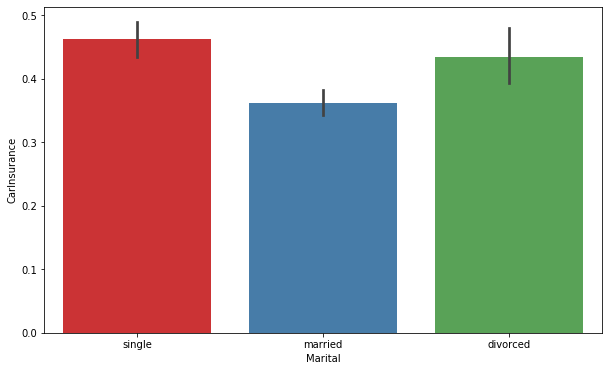

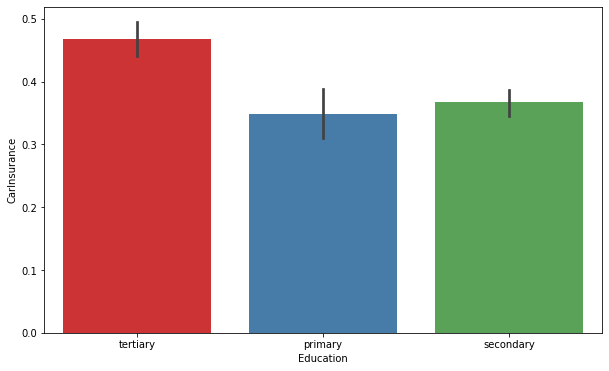

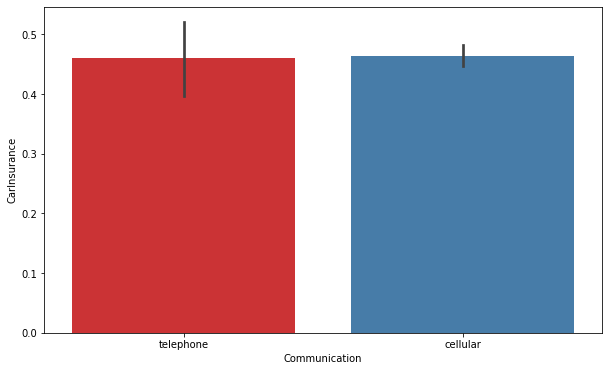

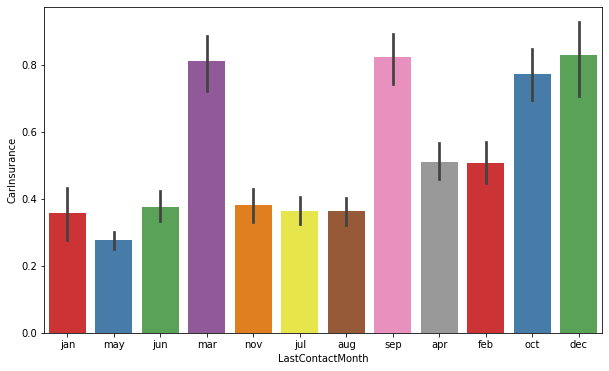

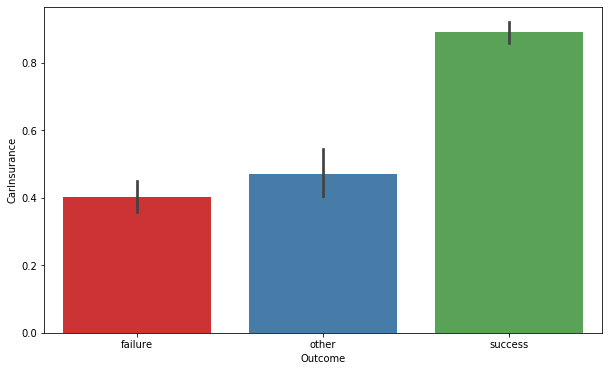

In [50]:
# run a for loop to build plot for all categorical variables -

for feature in categorical_col_plot:
    plt.figure(figsize=(10,6))
    sns.barplot(feature, 'CarInsurance', data=ins_df, palette='Set1')

- black line talks about the variability (i.e distribution of data)

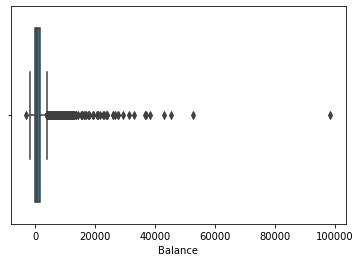

In [28]:
sns.boxplot(ins_df.Balance)

In [29]:
ins_df[ins_df.Balance>80000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [30]:
ins_df = ins_df.drop(ins_df[ins_df.index==1742].index)

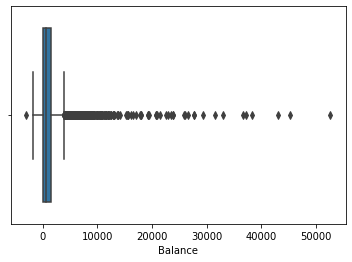

In [31]:
sns.boxplot(ins_df.Balance)

### Handling missing data -

In [32]:
ins_df.isna().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3041
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [33]:
merge_data = pd.concat([ins_df, ins_df_test], keys=('train','test'))

In [34]:
merge_data

Id  Age          Job  Marital  Education  Default  Balance  \
train 0       1   32   management   single   tertiary        0     1218   
      1       2   32  blue-collar  married    primary        0     1156   
      2       3   29   management   single   tertiary        0      637   
      3       4   25      student   single    primary        0      373   
      4       5   30   management  married   tertiary        0     2694   
...         ...  ...          ...      ...        ...      ...      ...   
test  995  4996   31       admin.   single  secondary        0      131   
      996  4997   52   management  married   tertiary        0     2635   
      997  4998   46   technician  married   tertiary        0     3009   
      998  4999   60      retired  married  secondary        0     7038   
      999  5000   28   management   single   tertiary        0      957   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 0              1        0     telephone              28   
      1              1        0           NaN              26   
      2              1        0      cellular               3   
      3              1        0      cellular              11   
      4              0        0      cellular               3   
...                ...      ...           ...             ...   
test  995            1        0      cellular              15   
      996            0        0      cellular               6   
      997            0        0      cellular               4   
      998            0        0     telephone               7   
      999            0        0      cellular              25   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 0                jan             2          -1             0      NaN   
      1                may             5          -1             0      NaN   
      2                jun             1         119             1  failure   
      3                may             2          -1             0      NaN   
      4                jun             1          -1             0      NaN   
...                    ...           ...         ...           ...      ...   
test  995              jun             1          -1             0      NaN   
      996              sep             1         108             8  success   
      997              aug             2          -1             0      NaN   
      998              oct             4          -1             0      NaN   
      999              may             2          -1             0      NaN   

          CallStart   CallEnd  CarInsurance  
train 0    13:45:20  13:46:30           0.0  
      1    14:49:03  14:52:08           0.0  
      2    16:30:24  16:36:04           1.0  
      3    12:06:43  12:20:22           1.0  
      4    14:35:44  14:38:56           0.0  
...             ...       ...           ...  
test  995  13:54:24  13:56:55           NaN  
      996  13:13:38  13:18:51           NaN  
      997  10:23:35  10:24:33           NaN  
      998  17:01:49  17:04:07           NaN  
      999  12:15:19  12:30:34           NaN  

[4999 rows x 19 columns]

In [35]:
merge_data.drop(['CarInsurance','Id'], axis=1, inplace=True)

In [36]:
merge_data.shape

(4999, 17)

In [37]:
total_missing = merge_data.isna().sum()

In [38]:
merge_data.isnull().count()

Age                 4999
Job                 4999
Marital             4999
Education           4999
Default             4999
Balance             4999
HHInsurance         4999
CarLoan             4999
Communication       4999
LastContactDay      4999
LastContactMonth    4999
NoOfContacts        4999
DaysPassed          4999
PrevAttempts        4999
Outcome             4999
CallStart           4999
CallEnd             4999
dtype: int64

In [39]:
percentage = (total_missing/merge_data.isnull().count())*100

In [40]:
percentage

Age                  0.000000
Job                  0.480096
Marital              0.000000
Education            4.320864
Default              0.000000
Balance              0.000000
HHInsurance          0.000000
CarLoan              0.000000
Communication       22.464493
LastContactDay       0.000000
LastContactMonth     0.000000
NoOfContacts         0.000000
DaysPassed           0.000000
PrevAttempts         0.000000
Outcome             75.975195
CallStart            0.000000
CallEnd              0.000000
dtype: float64

In [41]:
# combine total and percentage

nulls = pd.concat([total_missing,percentage], axis=1, keys=('Total','Percentage'))

In [42]:
nulls

,Total,Percentage
Age,0,0.000000
Job,24,0.480096
Marital,0,0.000000
Education,216,4.320864
Default,0,0.000000
Balance,0,0.000000
HHInsurance,0,0.000000
CarLoan,0,0.000000
Communication,1123,22.464493
LastContactDay,0,0.000000


In [43]:
# getting columns where there are misiing values

nulls[nulls.Total>0].sort_values(by='Total', ascending=False)

,Total,Percentage
Outcome,3798,75.975195
Communication,1123,22.464493
Education,216,4.320864
Job,24,0.480096


### Replacing missing values -

### 1 - Outcome

In [44]:
merge_data_df = merge_data.copy()

In [45]:
merge_data_df.groupby('Outcome')['Age'].nunique()

Outcome
failure    56
other      49
success    60
Name: Age, dtype: int64

In [46]:
merge_data_df.groupby('Outcome')['Age'].count()

Outcome
failure    548
other      248
success    405
Name: Age, dtype: int64

In [47]:
merge_data_df[merge_data_df.DaysPassed == -1]

Age          Job  Marital  Education  Default  Balance  \
train 0     32   management   single   tertiary        0     1218   
      1     32  blue-collar  married    primary        0     1156   
      3     25      student   single    primary        0      373   
      4     30   management  married   tertiary        0     2694   
      6     37       admin.   single   tertiary        0     1000   
...        ...          ...      ...        ...      ...      ...   
test  993   41     services  married  secondary        0      138   
      995   31       admin.   single  secondary        0      131   
      997   46   technician  married   tertiary        0     3009   
      998   60      retired  married  secondary        0     7038   
      999   28   management   single   tertiary        0      957   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 0              1        0     telephone              28   
      1              1        0           NaN              26   
      3              1        0      cellular              11   
      4              0        0      cellular               3   
      6              1        0      cellular              17   
...                ...      ...           ...             ...   
test  993            1        0           NaN               1   
      995            1        0      cellular              15   
      997            0        0      cellular               4   
      998            0        0     telephone               7   
      999            0        0      cellular              25   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts Outcome  \
train 0                jan             2          -1             0     NaN   
      1                may             5          -1             0     NaN   
      3                may             2          -1             0     NaN   
      4                jun             1          -1             0     NaN   
      6                mar             1          -1             0     NaN   
...                    ...           ...         ...           ...     ...   
test  993              jul             3          -1             0     NaN   
      995              jun             1          -1             0     NaN   
      997              aug             2          -1             0     NaN   
      998              oct             4          -1             0     NaN   
      999              may             2          -1             0     NaN   

          CallStart   CallEnd  
train 0    13:45:20  13:46:30  
      1    14:49:03  14:52:08  
      3    12:06:43  12:20:22  
      4    14:35:44  14:38:56  
      6    13:00:02  13:03:17  
...             ...       ...  
test  993  14:33:09  14:35:25  
      995  13:54:24  13:56:55  
      997  10:23:35  10:24:33  
      998  17:01:49  17:04:07  
      999  12:15:19  12:30:34  

[3798 rows x 17 columns]

In [48]:
merge_data_df.loc[merge_data_df['DaysPassed'] == -1, 'Outcome']

train  0      NaN
       1      NaN
       3      NaN
       4      NaN
       6      NaN
             ... 
test   993    NaN
       995    NaN
       997    NaN
       998    NaN
       999    NaN
Name: Outcome, Length: 3798, dtype: object

- wherever days passed is -1 , outcome has nan. 

In [49]:
merge_data_df.loc[merge_data_df['DaysPassed'] == -1, 'Outcome'] = 'NoPrev'

In [50]:
merge_data_df.Outcome.value_counts(1)

NoPrev     0.759752
failure    0.109622
success    0.081016
other      0.049610
Name: Outcome, dtype: float64

In [51]:
merge_data_df.Outcome.isnull().sum()

0

### 2 - Communication

In [52]:
merge_data_df.Communication.value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [53]:
merge_data_df.Communication.fillna('None', inplace=True)

In [54]:
merge_data_df.Communication.value_counts()

cellular     3529
None         1123
telephone     347
Name: Communication, dtype: int64

In [55]:
merge_data_df.Communication.isnull().sum()

0

### 3 - Education & Job

In [56]:
merge_data_df.Education.value_counts()

secondary    2489
tertiary     1600
primary       694
Name: Education, dtype: int64

In [57]:
merge_data_df.Education.isnull().sum()

216

In [58]:
# creating job-education level mapping list

edu_mode = []

In [59]:
# what are different job types

job_types = merge_data_df.Job.value_counts().index

In [60]:
job_types

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')

In [61]:
# checking which job is most common

merge_data_df.Job.value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [62]:
l=['secondary','tertiary','primary']

merge_data_df[merge_data_df['Education'].apply(lambda x:x not in l)]

Age          Job   Marital Education  Default  Balance  \
train 14    25     services    single       NaN        0     2022   
      27    45          NaN  divorced       NaN        0        0   
      50    54     services  divorced       NaN        0        0   
      53    78      retired   married       NaN        0     3208   
      58    34   management    single       NaN        0     6013   
...        ...          ...       ...       ...      ...      ...   
test  855   22      student    single       NaN        0     3317   
      867   77   management   married       NaN        0     1780   
      908   50  blue-collar   married       NaN        0     1537   
      972   62    housemaid   married       NaN        0     2021   
      984   35  blue-collar   married       NaN        0      568   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 14             0        0      cellular              29   
      27             0        0      cellular              21   
      50             1        0      cellular              16   
      53             0        0     telephone              20   
      58             1        0      cellular              18   
...                ...      ...           ...             ...   
test  855            0        0      cellular              10   
      867            1        0      cellular              23   
      908            0        0          None              17   
      972            0        0     telephone              26   
      984            1        0      cellular              14   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 14               jul             8          97            12    other   
      27               apr             3          -1             0   NoPrev   
      50               apr             1          -1             0   NoPrev   
      53               may             3          -1             0   NoPrev   
      58               may             1          -1             0   NoPrev   
...                    ...           ...         ...           ...      ...   
test  855              aug             1          -1             0   NoPrev   
      867              oct             2         183             3  success   
      908              jun             6          -1             0   NoPrev   
      972              feb             1          -1             0   NoPrev   
      984              may             2         293             1  failure   

          CallStart   CallEnd  
train 14   14:15:09  14:19:45  
      27   12:33:22  12:38:00  
      50   16:18:17  16:22:40  
      53   16:00:27  16:06:18  
      58   13:52:00  14:02:12  
...             ...       ...  
test  855  13:07:01  13:09:29  
      867  15:31:06  15:34:47  
      908  12:24:31  12:24:55  
      972  11:36:31  11:42:32  
      984  17:27:57  17:29:56  

[216 rows x 17 columns]

In [63]:
job_types

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')

In [64]:
merge_data_df[merge_data_df.Job=='management']['Education'].value_counts()

tertiary     928
secondary    119
primary       30
Name: Education, dtype: int64

In [65]:
merge_data_df[merge_data_df.Job=='management']['Education'].value_counts().nlargest(1)

tertiary    928
Name: Education, dtype: int64

In [66]:
merge_data_df[merge_data_df.Job=='management']['Education'].value_counts().nlargest(1).index

Index(['tertiary'], dtype='object')

In [67]:
for job in job_types:
    mode = merge_data_df[merge_data_df.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)

In [68]:
edu_mode

array(['tertiary', 'secondary', 'secondary', 'secondary', 'secondary',
       'secondary', 'tertiary', 'secondary', 'secondary', 'tertiary',
       'primary'], dtype=object)

In [69]:
pd.Series(edu_mode, index=merge_data_df.Job.value_counts().index)

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
unemployed       secondary
student          secondary
entrepreneur      tertiary
housemaid          primary
dtype: object

In [70]:
edu_map = pd.Series(edu_mode, index=merge_data_df.Job.value_counts().index)

In [71]:
merge_data_df.loc[merge_data_df['Job']=='management','Education']

train  0      tertiary
       2      tertiary
       4      tertiary
       7      tertiary
       15     tertiary
                ...   
test   955    tertiary
       962    tertiary
       977    tertiary
       996    tertiary
       999    tertiary
Name: Education, Length: 1113, dtype: object

In [72]:
edu_map.loc[edu_map.index=='management']

management    tertiary
dtype: object

In [73]:
edu_map.loc[edu_map.index=='management'][0]

'tertiary'

In [74]:
job_types

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')

In [75]:
# applying mapping to missing education variable

for j in job_types:
    merge_data_df.loc[(merge_data_df['Education'].isnull()) &
                       (merge_data_df['Job']==j),'Education'] == edu_map.loc[edu_map.index==j][0]

In [76]:
# for those that are still missing we will create a new category called none

merge_data_df['Education'].fillna('None', inplace=True)

In [77]:
merge_data_df.Education.value_counts()

secondary    2489
tertiary     1600
primary       694
None          216
Name: Education, dtype: int64

In [78]:
merge_data_df.Job.isnull().sum()

24

In [79]:
merge_data_df.Job.fillna('None', inplace=True)

In [80]:
merge_data_df.Job.isnull().sum()

0

In [81]:
merge_data_df.Job.value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
None               24
Name: Job, dtype: int64

In [82]:
merge_data_df.iloc[[50,53,58,867,908]]

Age          Job   Marital  Education  Default  Balance  \
train 50    54     services  divorced       None        0        0   
      53    78      retired   married       None        0     3208   
      58    34   management    single       None        0     6013   
      867   37  blue-collar    single  secondary        0     2235   
      908   55   technician    single   tertiary        0       92   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 50             1        0      cellular              16   
      53             0        0     telephone              20   
      58             1        0      cellular              18   
      867            1        0      cellular              20   
      908            1        0          None               7   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 50               apr             1          -1             0   NoPrev   
      53               may             3          -1             0   NoPrev   
      58               may             1          -1             0   NoPrev   
      867              apr             2         151             2  failure   
      908              may             3          -1             0   NoPrev   

          CallStart   CallEnd  
train 50   16:18:17  16:22:40  
      53   16:00:27  16:06:18  
      58   13:52:00  14:02:12  
      867  09:56:04  10:03:03  
      908  10:28:21  10:30:19

### seperate numeric and categorical data -

In [83]:
numeric_dtypes = merge_data_df.select_dtypes(include=np.number).columns
categorical_dtypes = merge_data_df.select_dtypes(include='object').columns

In [84]:
numeric_dtypes

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts'],
      dtype='object')

In [85]:
categorical_dtypes

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [86]:
merge_data_df_num = merge_data_df[numeric_dtypes] # seperating numeric data
merge_data_df_cat = merge_data_df[categorical_dtypes] # seperating categoric data

In [87]:
merge_data_df_cat.columns

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [88]:
# we will remove all call start call end variables from our variables

merge_data_df_cat = merge_data_df_cat[['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth','Outcome']]

In [89]:
# create dummy variables

merge_data_df_cat_dummies = pd.get_dummies(merge_data_df_cat)

In [90]:
ins_df_dummy = pd.concat([merge_data_df_num, merge_data_df_cat_dummies], axis=1)

In [91]:
ins_df_dummy

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0     32        0     1218            1        0              28   
      1     32        0     1156            1        0              26   
      2     29        0      637            1        0               3   
      3     25        0      373            1        0              11   
      4     30        0     2694            0        0               3   
...        ...      ...      ...          ...      ...             ...   
test  995   31        0      131            1        0              15   
      996   52        0     2635            0        0               6   
      997   46        0     3009            0        0               4   
      998   60        0     7038            0        0               7   
      999   28        0      957            0        0              25   

           NoOfContacts  DaysPassed  PrevAttempts  Job_None  ...  \
train 0               2          -1             0         0  ...   
      1               5          -1             0         0  ...   
      2               1         119             1         0  ...   
      3               2          -1             0         0  ...   
      4               1          -1             0         0  ...   
...                 ...         ...           ...       ...  ...   
test  995             1          -1             0         0  ...   
      996             1         108             8         0  ...   
      997             2          -1             0         0  ...   
      998             4          -1             0         0  ...   
      999             2          -1             0         0  ...   

           LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                       0                     0                     0   
      1                       0                     0                     1   
      2                       1                     0                     0   
      3                       0                     0                     1   
      4                       1                     0                     0   
...                         ...                   ...                   ...   
test  995                     1                     0                     0   
      996                     0                     0                     0   
      997                     0                     0                     0   
      998                     0                     0                     0   
      999                     0                     0                     1   

           LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                       0                     0                     0   
      1                       0                     0                     0   
      2                       0                     0                     0   
      3                       0                     0                     0   
      4                       0                     0                     0   
...                         ...                   ...                   ...   
test  995                     0                     0                     0   
      996                     0                     0                     1   
      997                     0                     0                     0   
      998                     0                     1                     0   
      999                     0                     0                     0   

           Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
train 0                 1                0              0                0  
      1                 1                0              0                0  
      2                 0                1              0                0  
      3                 1                0              0                0  
      4               

In [92]:
ins_df_dummy.isna().sum()

Age                        0
Default                    0
Balance                    0
HHInsurance                0
CarLoan                    0
LastContactDay             0
NoOfContacts               0
DaysPassed                 0
PrevAttempts               0
Job_None                   0
Job_admin.                 0
Job_blue-collar            0
Job_entrepreneur           0
Job_housemaid              0
Job_management             0
Job_retired                0
Job_self-employed          0
Job_services               0
Job_student                0
Job_technician             0
Job_unemployed             0
Marital_divorced           0
Marital_married            0
Marital_single             0
Education_None             0
Education_primary          0
Education_secondary        0
Education_tertiary         0
Communication_None         0
Communication_cellular     0
Communication_telephone    0
LastContactMonth_apr       0
LastContactMonth_aug       0
LastContactMonth_dec       0
LastContactMon

In [93]:
# split train and test using index we created

idx = pd.IndexSlice

In [94]:
idx

In [95]:
ins_df_dummy.loc[idx['train'],:]

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_None,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,32,0,1218,1,0,28,2,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,32,0,1156,1,0,26,5,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,29,0,637,1,0,3,1,119,1,0,...,1,0,0,0,0,0,0,1,0,0
3,25,0,373,1,0,11,2,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,30,0,2694,0,0,3,1,-1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,0,0,1,0,25,1,40,2,0,...,0,0,1,0,0,0,0,1,0,0
3996,49,0,124,1,1,29,19,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
3997,27,0,-400,0,1,8,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
3998,36,0,658,1,0,29,1,227,3,0,...,0,0,0,0,0,0,0,1,0,0


In [96]:
train_df = ins_df_dummy.loc[idx['train'],:]
test_df = ins_df_dummy.loc[idx['test'],:]

In [97]:
train_df

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_None,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,32,0,1218,1,0,28,2,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,32,0,1156,1,0,26,5,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,29,0,637,1,0,3,1,119,1,0,...,1,0,0,0,0,0,0,1,0,0
3,25,0,373,1,0,11,2,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,30,0,2694,0,0,3,1,-1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,0,0,1,0,25,1,40,2,0,...,0,0,1,0,0,0,0,1,0,0
3996,49,0,124,1,1,29,19,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
3997,27,0,-400,0,1,8,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
3998,36,0,658,1,0,29,1,227,3,0,...,0,0,0,0,0,0,0,1,0,0


In [98]:
# creating label (target variable)

train_label = ins_df['CarInsurance']

In [99]:
train_label

0       0
1       0
2       1
3       1
4       0
       ..
3995    1
3996    0
3997    0
3998    0
3999    0
Name: CarInsurance, Length: 3999, dtype: int64

In [100]:
print(train_df.shape)
print(test_df.shape)

(3999, 47)
(1000, 47)


## Building the model -

In [101]:
from sklearn.model_selection import train_test_split
# because we want to perform in sample validation first on the train data itself

In [102]:
X_train, X_test, y_train, y_test = train_test_split(train_df, train_label, test_size=0.3, random_state=100)

In [103]:
from sklearn.linear_model import LogisticRegression

- we will create two logistic models, one with deafult max_iter that is 100 and other with max_iter of 1000.

In [104]:
lr = LogisticRegression()

In [105]:
lr2 = LogisticRegression(max_iter=1000)

In [106]:
lr.fit(X_train, y_train)

C:\Users\SALMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
ypred = lr.predict(X_test)

In [109]:
ypred2 = lr2.predict(X_test)

In [110]:
# getting model performance matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

- In case of car insurance, we have to focus on FN and FN should be as less as possible because we dont want to loose the customers who will actually buy the car insurance.

In [111]:
confusion_matrix(y_test, ypred)

array([[613, 114],
       [268, 205]], dtype=int64)

In [112]:
confusion_matrix(y_test, ypred2)

array([[623, 104],
       [232, 241]], dtype=int64)

- In case of second model i.e. model with max_iter of 1000 the FN are less which is 232.

In [119]:
print('Accuracy of 1st model :',round(accuracy_score(y_test, ypred),3))
print('Precission of 1st model :',round(precision_score(y_test, ypred),3))
print('Recall of 1st model :',round(recall_score(y_test, ypred),3))

Accuracy of 1st model : 0.682
Precission of 1st model : 0.643
Recall of 1st model : 0.433


In [121]:
print('Accuracy of 2nd model :',round(accuracy_score(y_test, ypred2),3))
print('Precission of 2nd model :',round(precision_score(y_test, ypred2),3))
print('Recall of 2nd model :',round(recall_score(y_test, ypred2),3))

Accuracy of 2nd model : 0.72
Precission of 2nd model : 0.699
Recall of 2nd model : 0.51


- Accuracy and Recall both of the second model with max_iter of 1000 is more. Hence we can conclude that our 2nd model is better.